In [1]:
import ruptures as rpt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
sys.path.append('../SleepClasses/')
from AnomalyDetection import AnomalyDetection

# Mostra tutte le colonne
pd.set_option('display.max_columns', None)

# Controllo con più colonne insieme con ruptures base

In [2]:
with open('../SleepData/DFs/subject2.pkl', 'rb') as f:
    df = pickle.load(f)
df = df[df['nap']==False]
df.sort_values(by='date_end', ignore_index=True)
# Specifica le colonne in cui vuoi riempire i valori nulli
# Lista delle colonne da escludere
columnsNotToCheck = ['date','date_start','date_end', 'manual_sleep_duration', 'undefined_sleep_duration', 'out_of_bed', 'night_events', 'sleep_score', 'model', 'model_id', 'nap']
# Ottieni i nomi delle colonne rimanenti
columns_to_check = [col for col in df.columns if col not in columnsNotToCheck]
# Estrazione dei dati per l'analisi
merged_signal = np.vstack([df['light_sleep_duration'].values, df['rem_sleep_duration'].values, df['deep_sleep_duration'].values]).T  # Converti in array 2D (richiesto da ruptures)
print(np.shape(merged_signal))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_signal_scaled = scaler.fit_transform(merged_signal)

(464, 3)


Punti di cambiamento rilevati: [45, 275, 464] 3


<Figure size 1000x600 with 0 Axes>

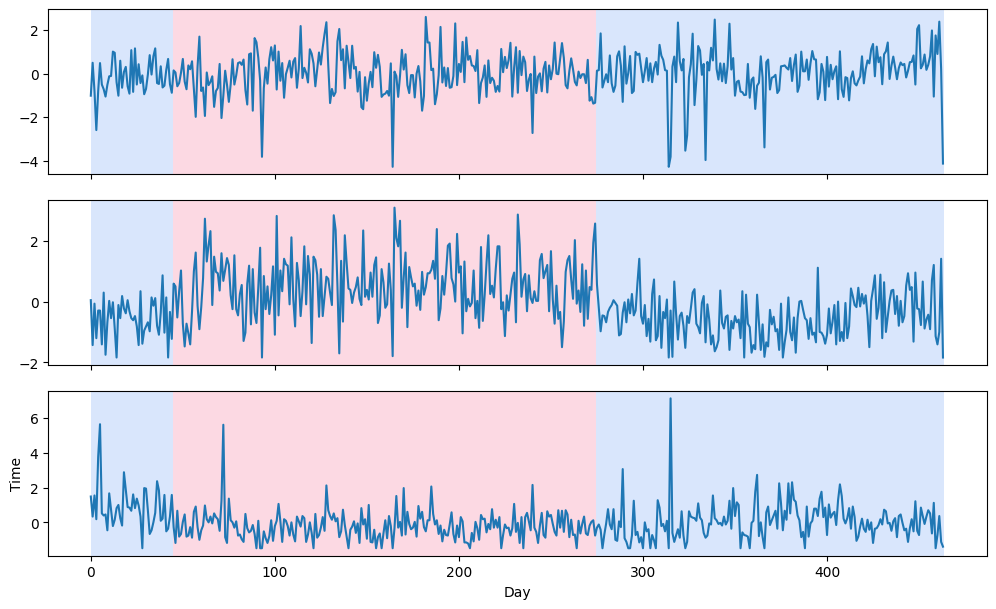

In [3]:
# Change Point Detection
model = rpt.Pelt(model="rbf", min_size=14).fit(merged_signal_scaled)  # Modello RBF per segmentazione multivariata/non lineare
result = model.predict(pen=5)

# Stampa i punti di cambiamento rilevati
print("Punti di cambiamento rilevati:", result, len(result))

# Visualizza il grafico
plt.figure(figsize=(10, 6))
rpt.display(merged_signal_scaled, result)
plt.xlabel("Day")
plt.ylabel("Time")
plt.show()

# Controllo con una colonna alla volta con ruptures base

In [4]:
with open('../SleepData/DFs/subject2.pkl', 'rb') as f:
    df = pickle.load(f)
df = df[df['nap']==False]
df.sort_values(by='date_end', ignore_index=True)
# Specifica le colonne in cui vuoi riempire i valori nulli
# Lista delle colonne da escludere
columnsNotToCheck = ['date','date_start','date_end', 'manual_sleep_duration', 'undefined_sleep_duration', 'out_of_bed', 'night_events', 'sleep_score', 'model', 'model_id', 'nap']
# Ottieni i nomi delle colonne rimanenti
columns_to_check = [col for col in df.columns if col not in columnsNotToCheck]

In [5]:
# Estrazione dei dati per l'analisi
light_signal = np.vstack([df['light_sleep_duration'].values]).T  # Converti in array 2D (richiesto da ruptures)
print(np.shape(light_signal))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
light_signal_signal_scaled = scaler.fit_transform(light_signal)

(464, 1)


In [6]:
# Estrazione dei dati per l'analisi
rem_signal = np.vstack([df['rem_sleep_duration'].values]).T  # Converti in array 2D (richiesto da ruptures)
print(np.shape(rem_signal))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rem_signal_signal_scaled = scaler.fit_transform(rem_signal)

(464, 1)


In [7]:
# Estrazione dei dati per l'analisi
deep_signal = np.vstack([df['deep_sleep_duration'].values]).T  # Converti in array 2D (richiesto da ruptures)
print(np.shape(deep_signal))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
deep_signal_signal_scaled = scaler.fit_transform(deep_signal)

(464, 1)


<Figure size 1000x600 with 0 Axes>

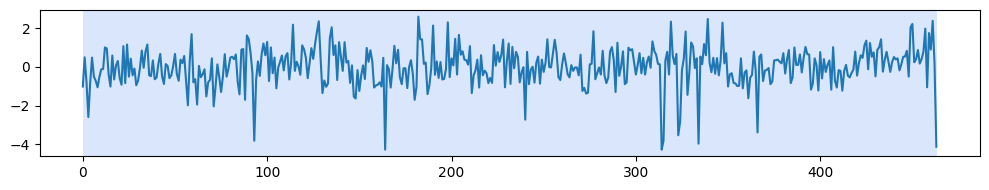

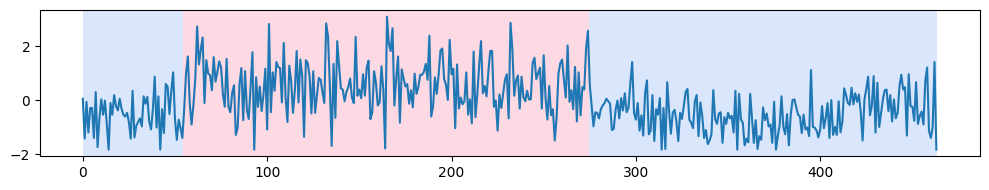

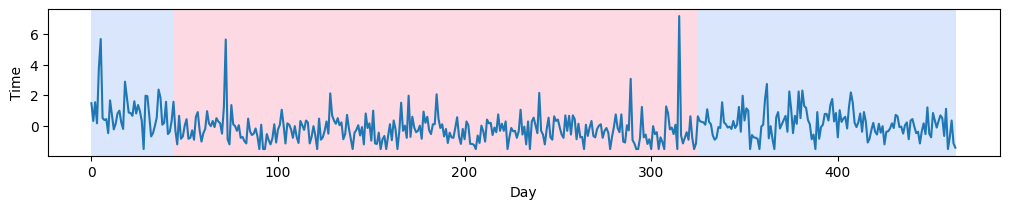

In [8]:
penalty = 5
# Change Point Detection
light_model = rpt.Pelt(model="rbf", min_size=14).fit(light_signal_signal_scaled)  # Modello RBF per segmentazione multivariata/non lineare
rem_model = rpt.Pelt(model="rbf", min_size=14).fit(rem_signal_signal_scaled)  # Modello RBF per segmentazione multivariata/non lineare
deep_model = rpt.Pelt(model="rbf", min_size=14).fit(deep_signal_signal_scaled)  # Modello RBF per segmentazione multivariata/non lineare
result_light = light_model.predict(pen=penalty)
result_rem = rem_model.predict(pen=penalty)
result_deep = deep_model.predict(pen=penalty)

# Visualizza il grafico
plt.figure(figsize=(10, 6))
rpt.display(light_signal_signal_scaled, result_light)
rpt.display(rem_signal_signal_scaled, result_rem)
rpt.display(deep_signal_signal_scaled, result_deep)
plt.xlabel("Day")
plt.ylabel("Time")
plt.show()

# Controllo una colonna alla volta con sliding window e ruptures custom

In [9]:
with open('../SleepData/DFs/subject2.pkl', 'rb') as f:
    df = pickle.load(f)
df = df[df['nap']==False]
df.sort_values(by='date_end', ignore_index=True)

,date,date_start,date_end,nap,manual_sleep_duration,undefined_sleep_duration,hr_average,hr_max,hr_min,rmssd_average,rmssd_max,rmssd_min,rr_average,rr_max,rr_min,sdnn_1_average,sdnn_1_max,sdnn_1_min,snoring_average,snoring_max,snoring_min,wakeup_count,out_of_bed_count,out_of_bed_time,out_of_bed,light_sleep_duration,deep_sleep_duration,rem_sleep_duration,wakeup_duration,total_sleep_time,nb_rem_episodes,sleep_efficiency,sleep_latency,total_timeinbed,apnea_hypopnea_index,breathing_disturbances_intensity,night_events,snoring,wakeup_latency,waso,snoringepisodecount,sleep_score,model,model_id,mvt_score_average,mvt_score_max,mvt_score_min,mvt_active_duration
0,2023-07-25,2023-07-25 00:08:00+02:00,2023-07-25 09:45:00+02:00,False,0.0,0.0,64,83,49,35.000000,52.0,0.0,16.000000,26.000000,8.0,52.000000,64.000000,0.0,0.000000,100.000000,0.0,6,2,0 days 00:16:00,"[{'date_start': 2023-07-25 04:00:00+02:00, 'da...",14520,5880,4980.0,8400,25380,4.0,0.750000,4320.0,33780.0,59.00,117.000000,"{""1"":[0,14460,16200],""2"":[4320,10680,3420,5460...",120.0,2100.0,2820.0,1.000000,69.0,32,63,2.285714,131.714286,0.0,810.0
1,2023-07-26,2023-07-25 23:27:00+02:00,2023-07-26 07:32:00+02:00,False,0.0,0.0,62,82,50,35.000000,45.0,0.0,15.000000,25.000000,10.0,43.000000,53.000000,0.0,0.000000,0.000000,0.0,3,0,0 days 00:00:00,[],21240,3600,1080.0,3180,25920,1.0,0.890000,2460.0,29100.0,30.41,60.000000,"{""1"":[0],""2"":[2460,8880,17160],""3"":[10980,1716...",0.0,0.0,720.0,0.000000,74.0,32,63,2.285714,131.714286,0.0,810.0
2,2023-07-27,2023-07-26 23:54:00+02:00,2023-07-27 09:33:00+02:00,False,0.0,0.0,61,78,48,37.000000,58.0,0.0,16.000000,26.000000,8.0,48.000000,58.000000,0.0,3.000000,100.000000,0.0,3,0,0 days 00:00:00,[],15480,6000,4680.0,8160,26160,3.0,0.760000,4320.0,34320.0,41.18,82.000000,"{""1"":[0,27240,6540],""2"":[4320,23280,6240],""3"":...",1320.0,0.0,4260.0,3.000000,72.0,32,63,2.285714,131.714286,0.0,810.0
3,2023-07-28,2023-07-28 02:33:00+02:00,2023-07-28 07:44:00+02:00,False,0.0,0.0,63,102,50,46.000000,52.0,0.0,16.000000,25.000000,9.0,50.000000,55.000000,0.0,0.000000,0.000000,0.0,3,1,0 days 00:06:00,"[{'date_start': 2023-07-28 04:00:00+02:00, 'da...",7500,3300,1680.0,5700,12480,2.0,0.690000,900.0,18180.0,-1.00,-1.000000,"{""1"":[0,5580,5280],""2"":[900,5280,5820],""3"":[52...",0.0,0.0,5280.0,0.000000,20.0,32,63,2.285714,131.714286,0.0,810.0
4,2023-08-04,2023-08-03 23:11:00+02:00,2023-08-04 08:14:00+02:00,False,0.0,0.0,60,81,48,46.714286,87.0,0.0,15.857143,22.142857,10.0,66.285714,217.285714,0.0,11.714286,85.714286,0.0,4,0,0 days 00:00:00,[],15420,10380,4080.0,2880,25800,0.0,0.900000,720.0,28680.0,48.59,96.833333,NaN,4780.0,0.0,6060.0,9.166667,73.0,16,93,2.285714,131.714286,0.0,810.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2024-12-28,2024-12-27 23:08:00+01:00,2024-12-28 08:14:00+01:00,False,0.0,0.0,67,84,53,50.000000,87.0,0.0,16.000000,22.000000,10.0,64.000000,241.000000,0.0,9.000000,100.000000,0.0,6,0,0 days 00:00:00,[],26820,0,1860.0,3600,28680,3.0,0.890000,840.0,32280.0,63.03,126.000000,"{""1"":[0,25260],""2"":[840,1200,3780,9360,4380,57...",3120.0,0.0,3240.0,10.000000,80.0,32,63,2.000000,135.000000,0.0,960.0
460,2024-12-29,2024-12-28 23:02:00+01:00,2024-12-29 07:59:00+01:00,False,0.0,0.0,66,90,52,47.000000,89.0,0.0,15.000000,22.000000,10.0,59.000000,206.000000,0.0,23.000000,100.000000,0.0,5,0,0 days 00:00:00,[],23040,1500,1140.0,5520,25680,1.0,0.820000,960.0,31200.0,55.17,110.000000,"{""1"":[0,5160,25740],""2"":[960,5760,9960,2580,10...",7260.0,0.0,5580.0,15.000000,74.0,32,63,2.000000,159.000000,0.0,720.0
461,2024-12-30,2024-12-29 23:05:00+01:00,2024-12-30 09:55:00+01:00,False,0.0,0.0,62,76,51,47.000000,86.0,0.0,15.000000,22.000000,9.0,58.000000,168.000000,0.0,2.000000,100.000000,0.0,5,0,0 days 00:00:00,[],29640,3660,2220.0,2580,35520,2.0,0.930000,1200.0,38100.0,38.53,77.000000,"{""1"":[0,5160,3072

In [10]:
anomaly = AnomalyDetection(df=df, windowSize=28, overlapWindow=21)

In [11]:
anomaly.start(column = 'light_sleep_duration', penalty = 5, minSize = 30, percentChangePoints=0.7)

In [12]:
anomaly.start(column = 'rem_sleep_duration', penalty = 5, minSize = 30, percentChangePoints=0.7)

In [13]:
anomaly.start(column = 'deep_sleep_duration', penalty = 5, minSize = 30, percentChangePoints=0.7)

In [14]:
anomaly.startTrend(column = 'light_sleep_duration', penalty = 5, minSize = 30, percentChangePoints=0.7)

In [15]:
anomaly.startTrend(column = 'rem_sleep_duration', penalty = 5, minSize = 30, percentChangePoints=0.7)

In [16]:
anomaly.startTrend(column = 'deep_sleep_duration', penalty = 5, minSize = 30, percentChangePoints=0.7)

<Figure size 1000x600 with 0 Axes>

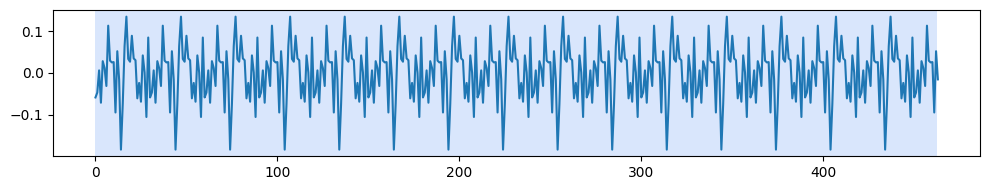

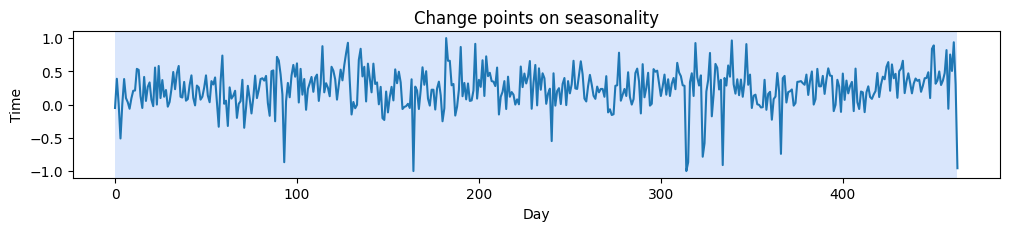

In [17]:
anomaly.startSeasonality(column = 'light_sleep_duration', penalty = 5, minSize = 14, percentChangePoints=0.7)

<Figure size 1000x600 with 0 Axes>

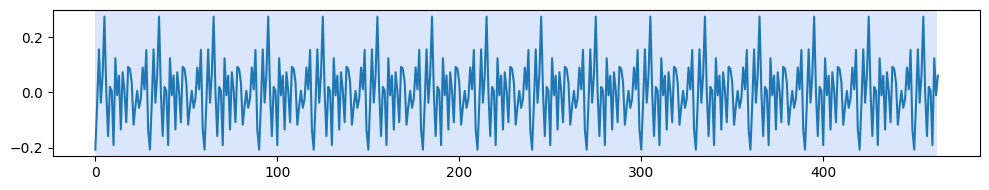

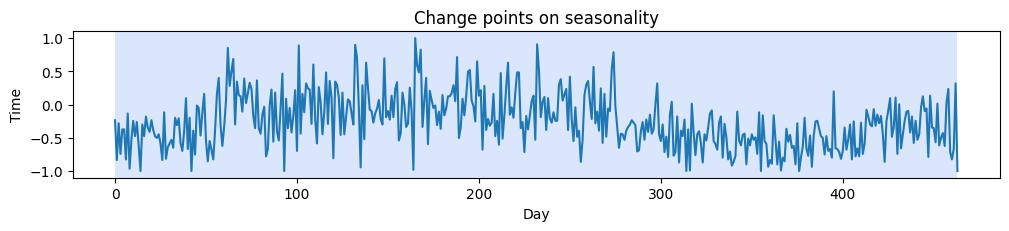

In [18]:
anomaly.startSeasonality(column = 'rem_sleep_duration', penalty = 5, minSize = 14, percentChangePoints=0.7)

<Figure size 1000x600 with 0 Axes>

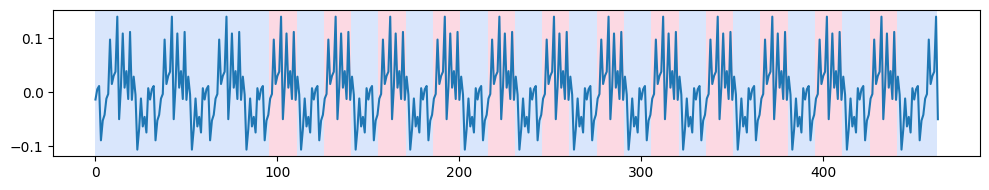

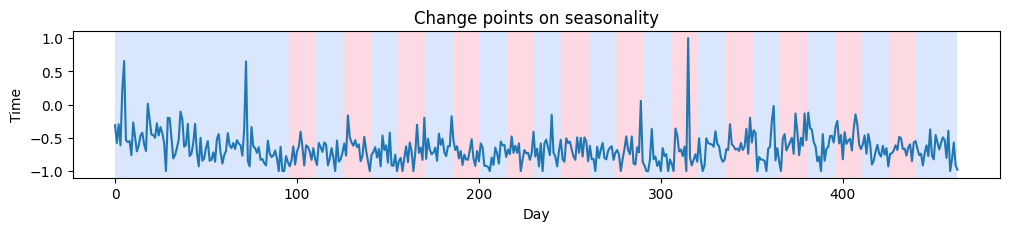

In [19]:
anomaly.startSeasonality(column = 'deep_sleep_duration', penalty = 5, minSize = 14, percentChangePoints=0.7)